In [18]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
ENSID2Entrez = dict(zip(HGNC["ensembl_gene_id"].values, HGNC["entrez_id"].values))
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))
Entrez2Symbol = dict(zip(HGNC["entrez_id"].values, HGNC["symbol"].values))
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
# Check enrichment
asc = pd.read_excel("../dat/genes/1-s2.0-S0092867419313984-mmc2.xlsx", sheet_name="Autosomal")
ssc = pd.read_excel("../dat/genes/pnas.1516376112.sd01.xlsx", sheet_name="ST1-genes-beautified")

In [148]:
ASC_NTrio = 6430
N_LGD = sum(asc["dn.ptv"])
N_LGD_exp = sum(asc["mut.ptv"]) * 2 * ASC_NTrio

In [149]:
print(N_LGD, N_LGD_exp, (N_LGD - N_LGD_exp)/N_LGD)

972 607.1299978120027 0.3753806606872401


In [120]:
0.3753806606872401

365

In [185]:
N_Mis = sum(asc["dn.misa"]) + sum(asc["dn.misb"])
N_Mis_exp = (sum(asc["mut.misa"]) + sum(asc["mut.misb"])) * 2 * ASC_NTrio

In [186]:
print(N_Mis, N_Mis_exp, (N_Mis - N_Mis_exp)/N_Mis)

1248 1065.95140089696 0.14587227492230773


In [125]:
1248-1065.95140089696

182.04859910304003

In [137]:
365 / 182

2.0054945054945055

In [132]:
asc102 = pd.read_excel("../dat/genes/1-s2.0-S0092867419313984-mmc2.xlsx", sheet_name="102_ASD")
asc102 = asc[asc["gene"].isin(asc102["gene"].values)]

In [133]:
sum(asc102["dn.ptv"])

216

In [134]:
sum(asc102["dn.misa"]) + sum(asc102["dn.misb"])

175

In [136]:
216 / 175

1.2342857142857142

In [145]:
SSC_Prob = 2508
SSC_Sib = 1911
N_LGD = sum(ssc["dnv_LGDs_prb"])
N_LGD_exp = sum(asc["mut.ptv"]) * 2 * ASC_NTrio#sum(ssc["dnv_LGDs_sib"]) 
print(N_LGD, N_LGD_exp, N_LGD/N_LGD_exp)

582 236.80902558514816 2.457676596413059


In [157]:
N_LGD = sum(ssc["dnv_synonymous_prb"])/SSC_Prob
N_LGD_exp = sum(ssc["dnv_synonymous_sib"])/SSC_Sib
print(N_LGD, N_LGD_exp, (N_LGD - N_LGD_exp)/N_LGD)

0.2579744816586922 0.25798011512297225 -2.1837292757959545e-05


In [152]:
ssc = pd.read_excel("../dat/genes/Supplementary_Table_7.xlsx")

In [154]:
SSC_Prob = 2508
SSC_Sib = 1911
N_LGD = sum(ssc["dnv_synonymous_prb"])/SSC_Prob
N_LGD_exp = sum(ssc["dnv_synonymous_sib"])/SSC_Sib
print(N_LGD, N_LGD_exp, N_LGD/N_LGD_exp)

0.2579744816586922 0.25798011512297225 0.9999781631840989


In [161]:
SSC_Prob = 2508
SSC_Sib = 1911
N_LGD = sum(ssc["dnv_LGDs_prb"])/SSC_Prob
N_LGD_exp = sum(ssc["dnv_LGDs_sib"])/SSC_Sib
print(N_LGD, N_LGD_exp, (N_LGD - N_LGD_exp)/N_LGD)

0.1559011164274322 0.09366823652537938 0.3991817462771061


In [162]:
0.3991817462771061 * sum(ssc["dnv_LGDs_prb"])

156.0800627943485

In [187]:
N_LGD = sum(ssc["dnv_missense_prb"])/SSC_Prob
N_LGD_exp = sum(ssc["dnv_missense_sib"])/SSC_Sib
print(N_LGD, N_LGD_exp, (N_LGD - N_LGD_exp)/N_LGD)

0.6678628389154705 0.598116169544741 0.10443262494435197


In [166]:
0.10443262494435197 * sum(ssc["dnv_missense_prb"])

174.92464678178956

In [167]:
156 / 175

0.8914285714285715

In [188]:
ssc_top = pd.read_excel("../dat/genes/pnas.1516376112.sd01.xlsx", sheet_name="ST1-genes-beautified")
ssc_top = ssc[ssc["gene"].isin(ssc_top["gene"].values[:134])]

In [189]:
sum(ssc_top["dnv_LGDs_prb"])

98

In [190]:
sum(ssc_top["dnv_missense_prb"])

97

In [191]:
1.75231E-05 * ASC_NTrio * 2

0.225347066

In [192]:
asc = pd.read_excel("../dat/genes/1-s2.0-S0092867419313984-mmc2.xlsx", sheet_name="102_ASD")
ssc = pd.read_excel("../dat/genes/pnas.1516376112.sd01.xlsx", sheet_name="ST1-genes-beautified")

In [193]:
tmp = ssc[ssc["GR_PUBNOAUT_LGDs_post"]>0.9]
print(tmp.shape)
sg_lgd_genes = set(tmp[tmp["type"].isin(["single LGD lower IQ", "single LGD higher IQ"])]["gene"].values)
print(len(sg_lgd_genes))

(139, 72)
52


In [194]:
tmp = ssc[ssc["GR_PUBNOAUT_LGDs_post"]>0.9]
print(tmp.shape)
sg_lgd_genes = set(tmp[tmp["type"].isin(["rec LGD", "single LGD lower IQ", "single LGD higher IQ"])]["gene"].values)
print(len(sg_lgd_genes))

(139, 72)
81


In [95]:
tmp[tmp["dnv_LGDs_prb"]>=1].shape

(81, 72)

In [85]:
tmp2 = asc
print(tmp2.shape)
#print(set(tmp2["HGNC"].values).difference(sg_lgd_genes))
print(set(sg_lgd_genes).difference(set(tmp2["gene"].values)))
print(len(set(sg_lgd_genes).difference(set(tmp2["gene"].values))))
print(len(set(sg_lgd_genes).intersection(set(tmp2["gene"].values))))

(105, 30)
{'WHSC1', 'SEMA6A', 'EP400', 'NOTCH1', 'VCP', 'ATP1B1', 'ZC3H14', 'ZNF462', 'STXBP5', 'UBR5', 'PHF3', 'CUL1', 'ZNF292', 'PDCD1', 'CUL3', 'DOT1L', 'TCF3', 'INTS6', 'EIF2AK2', 'DLL1', 'ARHGAP5', 'GOLGA5', 'PHF15', 'ATP1A1', 'ZFHX3', 'TNRC18', 'WNT7B', 'KDM4B', 'GIGYF2', 'NBEA', 'ZMYND11', 'NAA15', 'MED13', 'C11orf30', 'CNOT3', 'PCSK2', 'SRCAP', 'TANC2', 'C11orf24', 'SPEN', 'RAPGEF4', 'CDC42BPB', 'LTN1', 'CIC', 'JAKMIP1', 'TERF2', 'SKIDA1', 'KAT2B', 'KAT6A', 'UBN2', 'ELAVL2', 'XKR6', 'NEDD9', 'DSCAML1', 'AHDC1', 'TRIO', 'ITGA5', 'CSMD2', 'ERBB2IP', 'CASP8AP2', 'HECTD1', 'BTAF1', 'BRSK2', 'SUFU', 'LRRC4', 'NFIA', 'THSD7A', 'TAF4', 'NFIB', 'SPTBN1', 'NMT1', 'GAREM', 'CBX4', 'SRRM2', 'ARID5B', 'MAP3K14', 'SMURF1', 'UBAP2L', 'SLC25A6', 'MSL2', 'LARP4B', 'L1CAM'}
82
17


In [96]:
asc[asc["dn.ptv"]>0].shape

(72, 30)

In [109]:
asc[(asc["dn.ptv"]>0)&((asc["dn.misa"]>0)|(asc["dn.misb"]>0))].shape

(39, 30)

In [110]:
33 + 30 + 39

102

In [97]:
72/102

0.7058823529411765

In [99]:
81/139

0.5827338129496403

In [88]:
0.4 * 400

160.0

In [77]:
spark_tada = pd.read_csv("../dat/genes/TADA.SPARK.ONLY.txt", delimiter="\t")
spark_wigler = pd.read_csv("../dat/genes/spark_wiglermodel.csv")
spark_tada = spark_tada.sort_values("Qvalue")#.columns.values
spark_wigler = spark_wigler.sort_values("FDR")

In [78]:
tmp = spark_wigler[spark_wigler["FDR"]<0.2]
print(tmp.shape)
sg_lgd_genes = set(tmp[tmp["MUT.TYPE"]=="lgd"]["SYMBOL"].values)
print(len(sg_lgd_genes))

(371, 12)
116


In [79]:
tmp2 = spark_tada[spark_tada["Qvalue"]<0.2]
print(tmp2.shape)
#print(set(tmp2["HGNC"].values).difference(sg_lgd_genes))
print(set(sg_lgd_genes).difference(set(tmp2["HGNC"].values)))
print(len(set(sg_lgd_genes).difference(set(tmp2["HGNC"].values))))
print(len(set(sg_lgd_genes).intersection(set(tmp2["HGNC"].values))))

(110, 21)
{nan, 'CDC40', 'SRRM1', 'H3F3B', 'AFF4', 'RUNX1T1', 'BICRA', 'CAMTA1', 'KDM3B', 'MKL2', 'SOX5', 'PPFIA2', 'KIAA1958', 'MAZ', 'MSL3', 'ZNF292', 'SETD1B', 'CYFIP2', 'GATA2', 'NSD2', 'SLC6A1', 'KCNMA1', 'ARHGAP5', 'MIDN', 'COL4A1', 'PCLO', 'LRFN4', 'KMT2B', 'CDK13', 'AHR', 'SMG1', 'PCBP4', 'RCC2', 'ATAD2B', 'LRRC7', 'ROCK1', 'SMAD4', 'HERC2', 'CHRM4', 'ASXL2', 'RIPK1', 'CCT7', 'TRIML1', 'BTBD2', 'ZNF423', 'SON', 'SRCAP', 'RTN1', 'MACF1', 'CTNND1', 'EPHB6', 'KCNT1', 'DLGAP4', 'CACNA1E', 'AP1G1', 'NRXN3', 'CELF2', 'ZFYVE9', 'STT3B', 'ARHGEF12', 'NFIL3', 'SNAP91', 'KDM1A', 'USP9X', 'HDAC7', 'PRRC2A', 'PTPRA', 'DSCAML1', 'AHDC1', 'CSMD2', 'MED13L', 'ANKRD11', 'KCNB1', 'KDM5C', 'TSC2', 'UPF2', 'NRXN1', 'EXT1', 'SMARCD1', 'PUF60', 'ZFP36L2', 'ARHGEF17', 'ZNF805', 'WTIP', 'EPS15L1', 'BCL11B', 'TET3', 'PIEZO1', 'FBN1', 'PICALM', 'ATN1', 'HIC2', 'DNAJC5', 'SYT3', 'PTPRD', 'GALNT2', 'TAF4', 'GPR152', 'SPTBN1', 'ANAPC2', 'GAPVD1', 'SKI', 'CLK2', 'SRRM2', 'HEG1'}
105
11


In [81]:
tmp2[tmp2["HGNC"].isin(set(sg_lgd_genes).intersection(set(tmp2["HGNC"].values)))]

,GeneID,HGNC,ExACpLI,gnomADpLI,LoFOvsE,sHet,SFARICategory,SFARIScore,DDDCategory,DDDAllelic,...,DDDOrgan,dnLGD,mutLGD,log10BF_dnLGD,dnDmis,mutDmis,log10BF_dnDmis,log10BF_All,PP_All,Qvalue
6,ENSG00000169057,MECP2,0.698089047724915,8.9382e-01,8.5755e-02,0.0882033728499718,"Rare Single Gene Mutation, Syndromic, Functional",1,confirmed,x-linked dominant|hemizygous,...,"Brain/Cognition,GI tract",2,0.000002,2.10,7,0.000009,5.77,7.87,1.000,4.020000e-07
38,ENSG00000099381,SETD1A,0.999996231355084,1.0000e+00,5.9487e-02,0.304280384392774,.,.,probable,monoallelic,...,Brain/Cognition,2,0.000007,1.51,2,0.000022,0.79,2.30,0.947,8.880000e-03
45,ENSG00000119669,IRF2BPL,0.968935346112199,8.3623e-01,1.5675e-01,.,"Rare Single Gene Mutation, Syndromic",1,probable,monoallelic,...,Brain/Cognition,2,0.000003,2.09,0,0.000004,-0.12,1.97,0.890,2.000000e-02
50,ENSG00000134138,MEIS2,0.994254955106549,9.9938e-01,3.8881e-02,0.144679600719824,"Rare Single Gene Mutation, Syndromic",1,probable,monoallelic,...,NaN,2,0.000003,2.08,0,0.000006,-0.18,1.89,0.872,3.000000e-02
55,ENSG00000153234,NR4A2,0.991432865508232,9.9959e-01,0.0000e+00,0.241622722878938,Rare Single Gene Mutation,1,probable,monoallelic,...,NaN,2,0.000003,2.03,0,0.000011,-0.31,1.71,0.816,4.000000e-02
61,ENSG00000204406,MBD5,0.999852333253027,1.0000e+00,4.3103e-02,0.237216741361891,"Rare Single Gene Mutation, Syndromic",1,probable,monoallelic,...,Brain/Cognition,2,0.000005,1.68,0,0.000002,-0.05,1.64,0.796,6.000000e-02
63,ENSG00000198081,ZBTB14,0.628505782225752,2.6111e-01,2.4967e-01,0.0929288498219421,.,.,.,.,...,.,1,0.000001,0.91,1,0.000002,0.67,1.58,0.772,6.000000e-02
84,ENSG00000100207,TCF20,0.999977934276122,1.0000e+00,3.0129e-02,0.203852642966786,"Rare Single Gene Mutation, Syndromic",1,confirmed,monoallelic,...,Brain/Cognition,2,0.000008,1.38,0,0.000004,-0.11,1.26,0.625,1.200000e-01
90,ENSG00000113327,GABRG2,0.958543398155425,7.3852e-01,1.8958e-01,0.0881628365141871,.,.,probable,monoallelic,...,NaN,1,0.000002,0.77,1,0.000009,0.44,1.21,0.597,1.400000e-01
102,ENSG00000104853,CLPTM1,0.98048307691788,9.5767e-01,1.6508e-01,0.116517742381536,.,.,.,.,...,.,1,0.000004,0.63,1,0.000008,0.50,1.13,0.550,1.800000e-01


In [1]:
1.41E-05 * 6430 * 2

0.18132600000000001

In [2]:
11 / 0.18

61.111111111111114

In [3]:
from scipy.stats import chi2

In [9]:
u = 11 / 6430
alpha = 0.05
u

0.0017107309486780716

In [13]:
0.5 * chi2.ppf(alpha/2, 11*2)

5.49116036723684

In [14]:
0.5 * chi2.ppf(1-alpha/2, 11*2+2)

19.682038513301954

In [15]:
5.57 / 0.18

30.944444444444446

In [16]:
1 / 0.18

5.555555555555555

In [21]:
matching_feature = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/match-features.csv")
gnomad_constrain = pd.read_csv("/Users/jiayao/Work/Resources/gnomad.v2.1.1.lof_metrics.by_gene.txt", delimiter="\t", index_col="gene")

In [22]:
gnomad_constrain.head(2)

,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,possible_mis_pphen,...,gene_type,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position
gene,,,,,,,,,,,,,,,,,,,,,
MED13,ENST00000397786,871,1117.8,0.77921,0.000056,14195,314.0,529.75,0.59273,6708.0,...,protein_coding,122678,1.0,0.0,64.393,0.000000,NaN,17,60019966,60142643
NIPBL,ENST00000282516,846,1441.5,0.58688,0.000074,18540,158.0,543.10,0.29092,7135.0,...,protein_coding,189655,1.0,1.0,110.570,0.009044,NaN,5,36876861,37066515


In [23]:
gnomad_constrain.columns.values

array(['transcript', 'obs_mis', 'exp_mis', 'oe_mis', 'mu_mis',
       'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen', 'oe_mis_pphen',
       'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn',
       'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof', 'exp_lof',
       'pLI', 'pNull', 'pRec', 'oe_lof', 'oe_syn_lower', 'oe_syn_upper',
       'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper',
       'constraint_flag', 'syn_z', 'mis_z', 'lof_z', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'n_sites', 'classic_caf',
       'max_af', 'no_lofs', 'obs_het_lof', 'obs_hom_lof', 'defined', 'p',
       'exp_hom_lof', 'classic_caf_afr', 'classic_caf_amr',
       'classic_caf_asj', 'classic_caf_eas', 'classic_caf_fin',
       'classic_caf_nfe', 'classic_caf_oth', 'classic_caf_sas', 'p_afr',
       'p_amr', 'p_asj', 'p_eas', 'p_fin', 'p_nfe', 'p_oth', 'p_sas',
       'transcript_type', 'gene_id', 'transcript_level', 'cds_length',
       'num_codin

In [44]:
Exps, zscore = [], []
count = 0
for i, row in matching_feature.iterrows():
    try:
        _id = int(row["GENE"])
        gene = Entrez2Symbol[_id]
        z = gnomad_constrain.loc[gene, "lof_z"]
        if z!=z:
            continue
        z = float(z)
        exp = row["EXP"]
        zscore.append(z)
        Exps.append(exp)
        count += 1
    except:
        continue
print(count)

14935


In [45]:
print(len(Exps), len(zscore))

14935 14935


SpearmanrResult(correlation=0.3336620345704195, pvalue=0.0)

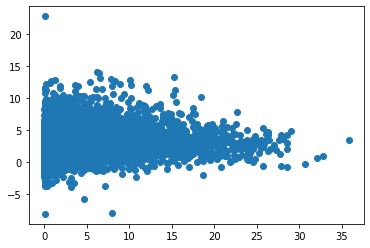

In [48]:
plt.scatter(Exps, zscore)
spearmanr(Exps, zscore)